In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

print(f"Version of TensorFlow : {tf.__version__}")

Version of TensorFlow : 2.15.0


In [4]:
data = pd.read_csv("creditcard_2023.csv")

In [5]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [6]:
print(f"Shape of data : {data.shape}")

Shape of data : (568630, 31)


## Preprocessing

##### Checking for duplicated data points and removing them

In [7]:
duplicated_values = data.value_counts()
duplicated_values = duplicated_values.to_frame()
duplicated_values.head(10)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0,1
379089,0.211525,-0.172433,0.389090,-0.520573,0.605021,0.154907,0.629336,-0.149879,0.376518,0.485291,-0.062064,0.695621,-0.620391,0.341974,0.055285,0.501684,0.734376,0.561183,0.332665,-0.122305,-0.190367,-0.483677,0.040308,1.227441,-0.864953,0.369719,-0.180891,-0.130064,5114.32,1,1
379083,-0.056224,0.812127,-0.901054,1.340335,0.572430,-1.108707,-0.168552,0.044594,-1.323992,-0.901344,0.927204,-1.148801,-0.729588,-1.585337,0.657354,-0.459101,-0.253884,0.267426,-0.384456,0.549243,0.106539,-0.598813,-0.222497,-0.920982,-0.234792,0.728264,0.856948,0.942765,21612.50,1,1
379084,-0.661333,0.718460,-0.627551,1.009158,-0.610775,0.162125,-0.632635,0.014514,-1.030040,-0.755540,0.853292,-1.100166,-0.388581,-1.093695,0.672853,-1.310834,-1.149475,-1.409933,0.803254,0.051403,0.673335,-0.309568,0.318867,-0.280152,-0.691953,0.310704,0.617553,0.538272,3875.05,1,1
379085,0.908772,-0.120471,0.259350,0.334283,0.530768,0.306387,0.485395,-0.116964,-0.046796,0.492581,0.286629,0.413548,-1.123131,-0.019479,0.359567,1.681941,1.137343,1.205748,-1.577292,-0.327593,-0.131594,-0.258222,-0.100895,-0.415285,0.660461,0.153713,-0.212130,0.053075,13369.44,1,1
379086,-0.988588,0.210995,-0.685727,0.832897,-0.717356,0.143710,-0.654842,-0.027151,-0.705800,-0.723645,0.816733,-0.932878,-0.331674,-0.936884,0.922593,-0.937358,-1.074161,-0.904533,0.678118,-0.760861,-0.049257,0.656853,0.249006,-0.274331,-0.294853,-0.389519,-0.643844,0.237237,23063.22,1,1
379087,0.060282,0.576045,-0.739466,1.076765,1.078398,-0.947936,0.163517,-0.001971,-1.080344,-0.530279,1.011454,-0.681080,-0.825464,-1.279849,-0.577576,0.664725,0.632843,1.908391,-1.322008,0.190153,0.011185,-0.507180,-0.099939,-0.959833,-0.847559,0.172763,0.372449,0.617530,3659.93,1,1
379088,-0.920784,0.253166,-0.986008,0.576595,-0.612349,-1.121961,-0.514484,0.447629,-0.940910,-1.038442,0.958835,-1.041447,-0.325763,-1.195772,-0.176406,-0.837172,-1.001923,-0.819470,0.171095,0.055188,0.198699,-0.370894,-0.169600,-0.450099,0.008034,1.729979,1.571240,-0.898110,507.83,1,1
379090,-1.864083,1.771047,-1.801018,1.555376,-2.225492,-1.801494,-1.947294,2.786778,-1.685096,-1.692345,1.380750,-1.490524,1.822770,-1.128814,-0.079670,-1.666332,-1.889376,-1.874638,1.559518,-0.356620,0.783244,-0.419915,-0.882868,0.933353,0.522755,-0.105125,-0.764064,-1.024260,15846.81,1,1


In [8]:
data = data.drop_duplicates()
data = data.reset_index()
data = data.drop(['index'], axis=1)
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [9]:
print(f"Shape of updated data : {data.shape}")

Shape of updated data : (568630, 31)


##### Checking NaN values

In [10]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Checking the distribution of the Class and Undersampling

Here, output y is called class
* If Class = 1 -> Fraud Transaction
* If Class = 0 -> Legit Transaction

In [11]:
data['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

The data exhibits a significant bias towards legitimate transactions. A basic model predicting legitimate transactions every time would yield an accuracy of over 99%, which is not ideal. Therefore, #undersampling the data is necessary.

In [12]:
legit_data = data[data['Class'] == 0]
fraud_data = data[data['Class'] == 1]

In [13]:
print(f"Shape of Legit Data : {legit_data.shape}")
print(f"Shape of Fraud Data : {fraud_data.shape}")

Shape of Legit Data : (284315, 31)
Shape of Fraud Data : (284315, 31)


Taking random samples from Legit Data same as size of Fraud Data

In [14]:
legit_data_updated = legit_data.sample(n = fraud_data.shape[0])

In [15]:

print(f"Shape of Legit Data : {legit_data_updated.shape}")
print(f"Shape of Fraud Data : {fraud_data.shape}")

Shape of Legit Data : (284315, 31)
Shape of Fraud Data : (284315, 31)


In [16]:
# Concatenate the data
data_updated = pd.concat([legit_data_updated, fraud_data], axis = 0)
data_updated

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
111707,111707,0.694963,-0.882530,0.783744,-0.569315,-0.091517,0.729775,0.259610,-0.094121,1.288289,...,-0.151553,-0.610363,-0.232743,-0.746233,0.087612,1.909166,-0.333097,-0.026558,16224.94,0
272359,272359,1.754765,-0.689580,0.191956,-1.099040,0.047283,0.185602,0.250873,-0.157761,1.643650,...,-0.179427,-0.535568,0.377727,1.004876,-1.042643,0.697150,-0.297781,-0.190833,19988.02,0
104303,104303,0.992428,-0.586185,0.522055,-0.501355,0.158892,0.695179,0.313742,-0.135608,-0.193725,...,-0.192054,-0.234534,-0.173431,-1.139628,0.832451,-0.540935,-0.181830,-0.059058,20098.28,0
37348,37348,1.296239,-0.732677,0.460905,-1.332655,-0.174424,-0.493960,0.281885,-0.243842,-0.520252,...,-0.168251,-0.108952,-0.053598,1.501551,0.959721,-0.220884,-0.243411,-0.081674,3714.21,0
157956,157956,1.760428,-0.351836,0.005991,-0.273128,0.238043,-0.608463,0.485640,-0.255099,1.979832,...,-0.076417,0.507139,0.025701,0.671312,0.161151,-0.378910,-0.275896,-0.182703,10071.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [17]:
# randomly shuffling
data_updated = data_updated.sample(frac=1)
data_updated

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
37297,37297,0.929827,-0.744337,0.751269,-0.767331,-0.179179,-0.142400,0.353025,-0.217470,0.071228,...,-0.318133,-1.044769,0.067248,1.624568,0.016155,1.665206,-0.312367,-0.014053,18575.19,0
322321,322321,0.748395,0.022948,-0.304592,0.382529,0.727282,0.311180,0.405616,-0.098597,-0.116607,...,-0.120774,-0.406429,-0.163311,-1.206826,0.434680,0.223571,-0.110676,0.012594,113.57,1
95832,95832,-0.098337,-0.211463,3.143321,-0.514411,0.156229,0.311317,0.649059,-0.179317,0.593689,...,-0.112939,0.189668,-0.328855,1.580709,0.577060,-1.361056,-0.316030,-0.432824,13160.13,0
526143,526143,-0.521679,-1.539715,-0.456079,0.542742,-0.697159,0.730663,0.504171,-0.166097,0.066641,...,0.218257,-0.521850,-1.513290,-0.003902,0.124360,1.049584,0.515806,0.595133,23828.77,1
558125,558125,-1.509684,1.533434,-1.514092,0.763296,-1.526225,-1.812233,-1.190673,1.874999,-0.605187,...,0.257557,-0.862590,-0.269442,-0.020621,0.930226,-0.619759,1.269362,0.424184,7621.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353011,353011,-2.459141,3.326970,-2.476251,1.785864,-2.828982,-0.276048,-3.424998,-2.207020,-2.787201,...,-4.328204,3.653956,0.930769,0.542946,-1.236161,-2.571824,-4.947034,-3.337478,17784.16,1
24036,24036,0.903033,-0.524903,1.274902,-0.330621,-0.022278,0.752282,0.201881,-0.076820,0.884145,...,-0.105230,0.141297,0.016264,0.167655,0.190952,0.722311,-0.200513,-0.063512,22222.18,0
383570,383570,0.981666,0.293938,-0.701628,1.011442,0.808507,-0.323169,0.105185,-0.064662,-0.725547,...,-0.001881,-0.427550,-0.123798,0.281834,0.713542,0.393709,0.325241,0.550784,5396.34,1
317851,317851,-1.212426,-2.197489,-0.647501,-0.082114,-0.641578,-0.269813,-0.076320,0.147549,-0.321130,...,0.080506,-0.056896,-2.458332,-0.527464,-0.486946,-0.487787,-0.143353,-2.210844,11118.02,1


In [18]:
data_updated['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

## Splitting the dataset and Feature Selection

In [55]:
X = data_updated.iloc[:300000,:-1]
Y = data_updated.iloc[:300000,-1]

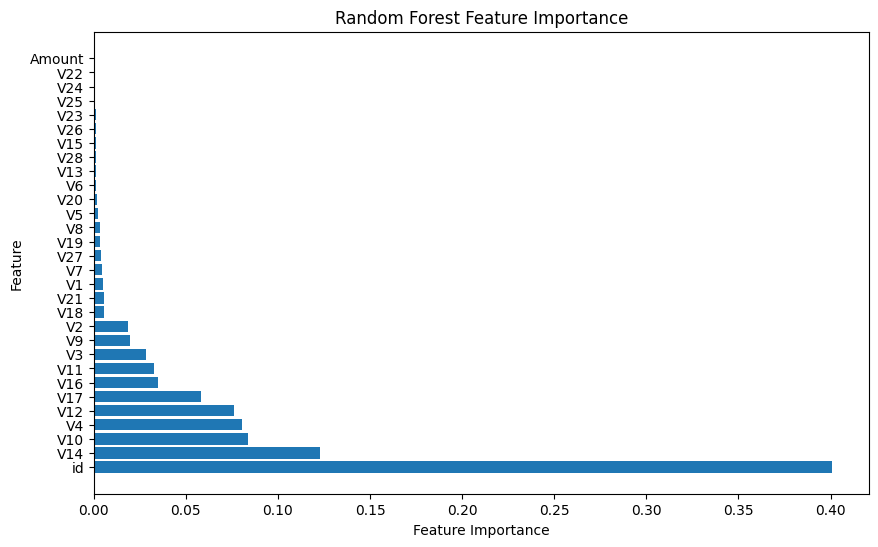

In [56]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, Y_train)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

In [59]:
X = X.loc[:, ['V14','V10','V4','V12','V17','V16','V11','V3','V9','V2']]
X.head()

,V14,V10,V4,V12,V17,V16,V11,V3,V9,V2
37297,0.582543,0.832853,-0.767331,1.085882,0.543099,-0.236106,-0.774263,0.751269,0.071228,-0.744337
322321,-0.419332,0.093250,0.382529,0.065119,0.680594,0.361742,-0.278359,-0.304592,-0.116607,0.022948
95832,0.307854,0.300237,-0.514411,1.253738,0.288090,0.461527,-0.896224,3.143321,0.593689,-0.211463
526143,-0.667497,-0.482490,0.542742,-0.502385,-0.489212,-0.456634,0.702331,-0.456079,0.066641,-1.539715
558125,-0.883250,-0.865982,0.763296,-0.903702,-0.796127,-0.814624,0.465182,-1.514092,-0.605187,1.533434


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, shuffle=True)

In [62]:
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of Y_train : {Y_train.shape}")
print(f"Shape of Y_test : {Y_test.shape}")

Shape of X_train : (195000, 10)
Shape of X_test : (105000, 10)
Shape of Y_train : (195000,)
Shape of Y_test : (105000,)


In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
print(f"Shape of X_train : {X_train.shape}")


Shape of X_train : (195000, 10)


In [65]:
# from sklearn.feature_selection import SelectKBest, mutual_info_classif
# from sklearn.datasets import make_classification
# # Get feature names
# feature_names = [f"Feature_{i}" for i in range(X_train.shape[1])]
# # Calculate mutual information scores
# mi_scores = mutual_info_classif(X_train, Y_train)

# # Select top k features with the highest mutual information scores
# top_k_features_mask = SelectKBest(mutual_info_classif, k=9).fit(X_train, Y_train).get_support()

# # Get the names of selected features
# selected_features = [feature_names[i] for i, is_selected in enumerate(top_k_features_mask) if is_selected]

# # Print selected features
# print("Selected Features: ", selected_features)


In [66]:
X_train.shape

(195000, 10)

In [68]:
print(f"Shape of X_train : {X_train.shape}")

Shape of X_train : (195000, 10)


## Models and Algorithm

### 1. Logistic Regression

In [69]:
logistic_r = LogisticRegression(penalty='l2', C=0.0001)
logistic_r.fit(X_train, Y_train)

LogisticRegression(C=0.0001)

In [70]:
Y_logistic_r = logistic_r.predict(X_test)
Y_logistic_r

array([0, 1, 1, ..., 0, 0, 0])

In [71]:
from sklearn.model_selection import cross_val_score

# Assuming you have X_train and Y_train
logistic_r = LogisticRegression(penalty='l2', C=0.1)
cv_scores_precision = cross_val_score(logistic_r, X_train, Y_train, cv=5, scoring='precision')
print(cv_scores_precision)

[0.97790529 0.97834709 0.97752087 0.97818882 0.97802316]


In [72]:
print(f"Accuracy : {accuracy_score(Y_test, Y_logistic_r)*100}%")
print(f"Confusion Matrix : \n {confusion_matrix(Y_test, Y_logistic_r)}")

Accuracy : 94.84190476190476%
Confusion Matrix : 
 [[52078   405]
 [ 5011 47506]]


### 2.Decision Tree Classifier

In [73]:
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier with initial regularization
decision_tree_classification = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # Start with a shallower tree
    min_samples_split=100,  # Require more samples to split
    min_samples_leaf=30,  # Require more samples at leaf nodes
    max_features='sqrt',  # Consider fewer features at each split
    ccp_alpha=0.001  # Enable cost complexity pruning
)

# Define a grid of hyperparameters to explore
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [20, 30, 40],
    'ccp_alpha': [0.001, 0.006 , 0.01],
}

# Perform grid search cross-validation to find optimal hyperparameters
grid_search = GridSearchCV(decision_tree_classification, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_


In [74]:
Y_DTc= best_model.predict(X_test)

In [75]:
print(f"Accuracy : {accuracy_score(Y_test, Y_DTc)*100}%")
print(f"Confusion Matrix : \n {confusion_matrix(Y_test, Y_DTc)}")

Accuracy : 95.24476190476192%
Confusion Matrix : 
 [[51161  1322]
 [ 3671 48846]]


### 3. Random Forest Classifier

In [81]:
# param_grid = {
#     'n_estimators': [10, 20, 50, 100],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# random_forest_classification = RandomForestClassifier(n_estimators = 20, random_state=42)
# grid_search = GridSearchCV(random_forest_classification, param_grid, cv=5)
# grid_search.fit(X_train, Y_train)
# best_params = grid_search.best_params_
# best_random_forest = RandomForestClassifier(random_state=42, **best_params)
# best_random_forest.fit(X_train, Y_train)
# test_accuracy = best_random_forest.score(X_test, Y_test)
# print("Test Accuracy:", test_accuracy)

In [83]:
# Y_RF_class = random_forest_classification.predict(X_test)

In [84]:
# print(f"Accuracy : {accuracy_score(Y_test, Y_RF_class)*100}%")
# print(f"Confusion Matrix : \n {confusion_matrix(Y_test, Y_RF_class)}")

### 4. Neural Network approach

In [85]:
model = Sequential()
model.add(Input(X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [86]:
model.compile(loss = binary_crossentropy,
              optimizer = SGD(learning_rate = 0.001),
              metrics = [
                  BinaryAccuracy(name='accuracy'),
                  Precision(name='precision'),
                  Recall(name='recall')]
              )

In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                704       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 16)               

In [88]:
history = model.fit(X_train, Y_train, epochs = 15,  validation_split = 0.25)

Epoch 1/15
4571/4571 [==============================] - 21s 4ms/step - loss: 0.5026 - accuracy: 0.7458 - precision: 0.7294 - recall: 0.7804 - val_loss: 0.2214 - val_accuracy: 0.9253 - val_precision: 0.9979 - val_recall: 0.8521
Epoch 2/15
4571/4571 [==============================] - 15s 3ms/step - loss: 0.2676 - accuracy: 0.9045 - precision: 0.9332 - recall: 0.8712 - val_loss: 0.1605 - val_accuracy: 0.9416 - val_precision: 0.9915 - val_recall: 0.8906
Epoch 3/15
4571/4571 [==============================] - 17s 4ms/step - loss: 0.2214 - accuracy: 0.9289 - precision: 0.9627 - recall: 0.8922 - val_loss: 0.1485 - val_accuracy: 0.9466 - val_precision: 0.9890 - val_recall: 0.9032
Epoch 4/15
4571/4571 [==============================] - 15s 3ms/step - loss: 0.2012 - accuracy: 0.9379 - precision: 0.9745 - recall: 0.8993 - val_loss: 0.1418 - val_accuracy: 0.9484 - val_precision: 0.9874 - val_recall: 0.9083
Epoch 5/15
4571/4571 [==============================] - 15s 3ms/step - loss: 0.1916 - accura

ValueError: x and y must have same first dimension, but have shapes (150,) and (15,)

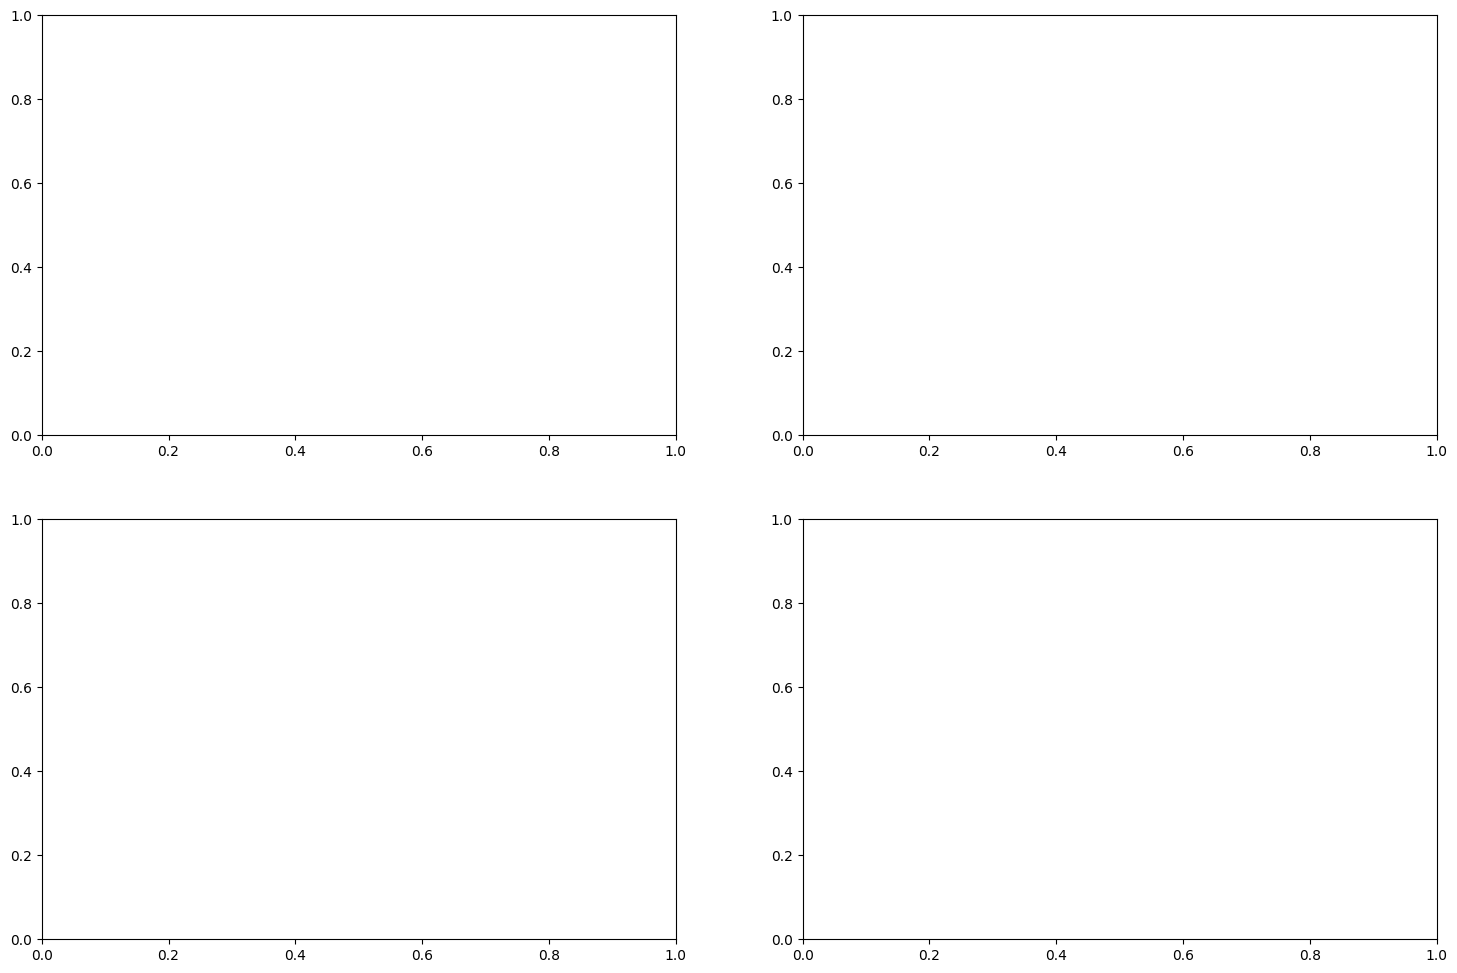

In [90]:
epochs = len(history.history['loss'])
i = np.arange(1, 151)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figheight(12)
fig.set_figwidth(18)

ax1.plot(i, history.history['loss'])
ax1.plot(i, history.history['val_loss'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss vs Epoch')
ax1.legend(['Training', 'Validation'])

ax2.plot(i, history.history['accuracy'])
ax2.plot(i, history.history['val_accuracy'])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy vs Epoch')
ax2.legend(['Training', 'Validation'])

# If you want to plot precision and recall, you may need to calculate them during training and store in 'history'
# Assuming history contains 'precision', 'val_precision', 'recall', 'val_recall'
ax3.plot(i, history.history['precision'])
ax3.plot(i, history.history['val_precision'])
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Precision')
ax3.set_title('Precision vs Epoch')
ax3.legend(['Training', 'Validation'])

ax4.plot(i, history.history['recall'])
ax4.plot(i, history.history['val_recall'])
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Recall')
ax4.set_title('Recall vs Epoch')
ax4.legend(['Training', 'Validation'])

plt.show()

In [91]:
Y_neural_net = model.predict(X_test)
Y_neural_net = [1 if i > 0.5 else 0 for i in list(Y_neural_net)]

3282/3282 [==============================] - 5s 1ms/step


In [92]:
print(f"Accuracy : {accuracy_score(Y_test, Y_neural_net)*100}%")
print(f"Confusion Matrix : \n {confusion_matrix(Y_test, Y_neural_net)}")

Accuracy : 96.22666666666667%
Confusion Matrix : 
 [[51460  1023]
 [ 2939 49578]]


## Conclusion


All models work good but Neural Network gives the highest accuracy marginally i.e. 96.47%

In [93]:
print(f"Accuracy by Logistic Regression : {accuracy_score(Y_test, Y_logistic_r)*100}%")
print(f"Accuracy by Decision Tree Classifier : {accuracy_score(Y_test, Y_DTc)*100}%")
#print(f"Accuracy by Random Forest Classifier : {accuracy_score(Y_test, Y_RF_class)*100}%")
print(f"Accuracy by Neural Network : {accuracy_score(Y_test, Y_neural_net)*100}%")

Accuracy by Logistic Regression : 94.84190476190476%
Accuracy by Decision Tree Classifier : 95.24476190476192%
Accuracy by Neural Network : 96.22666666666667%


In [94]:
print(f"Confusion Matrix for Logistic Regression : \n {confusion_matrix(Y_test, Y_logistic_r)}")
print(f"Confusion Matrix for Decision Tree Classifier : \n {confusion_matrix(Y_test, Y_DTc)}")
#print(f"Confusion Matrix for Random Forest Classifier : \n {confusion_matrix(Y_test, Y_RF_class)}")
print(f"Confusion Matrix for Neural Network : \n {confusion_matrix(Y_test, Y_neural_net)}")

Confusion Matrix for Logistic Regression : 
 [[52078   405]
 [ 5011 47506]]
Confusion Matrix for Decision Tree Classifier : 
 [[51161  1322]
 [ 3671 48846]]
Confusion Matrix for Neural Network : 
 [[51460  1023]
 [ 2939 49578]]


In [101]:
from sklearn.metrics import f1_score

f1 = f1_score(Y_test, Y_logistic_r)

print(f"F1 Score for Logistic regresson: {f1}")
#---------------------------------------------------------------------------
f1 = f1_score(Y_test, Y_DTc)

print(f"F1 Score for Decision tree     : {f1}")
#---------------------------------------------------------------------------
#f1 = f1_score(Y_test, Y_RF_class)

# print(f"F1 Score: {f1}")
#---------------------------------------------------------------------------
f1 = f1_score(Y_test, Y_neural_net)

print(f"F1 Score for Neural Network    : {f1}")

F1 Score for Logistic regresson: 0.9460708169036524
F1 Score for Decision tree     : 0.9513755660515169
F1 Score for Neural Network    : 0.9615779980216839
